In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle



In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload spam.csv manually

Saving spam.csv to spam (1).csv


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

# Display first 5 rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:


df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Convert labels to binary (ham=0, spam=1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})



<ipython-input-10-c31a48cf8e98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


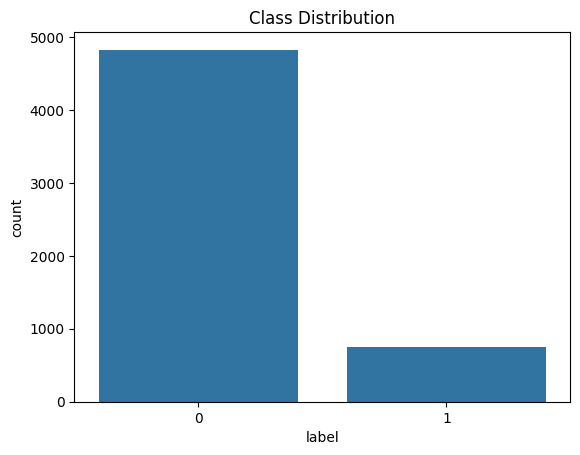

In [ ]:
# Check class distribution
sns.countplot(x=df['label'])
plt.title("Class Distribution")
plt.show()

In [ ]:
# Text preprocessing & vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['message']).toarray()
y = df['label']

In [ ]:
# Handling imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9658031088082901
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       985
           1       0.98      0.95      0.96       945

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930



In [ ]:
# Save the model & vectorizer
pickle.dump(model, open("spam_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

In [ ]:
from google.colab import files

# Download saved model and vectorizer
files.download("spam_model.pkl")
files.download("tfidf_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>